<a href="https://colab.research.google.com/github/ashamril/Text-Analytics/blob/master/Malaya_BM_Twitter_Sentiment_Analysis_on_any_keyword_here_in_Malaysia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Twitter Sentiment Analysis on any_keyword_here in Malaysia
Using **Malaya**, a **Natural-Language-Toolkit** library for **Bahasa Malaysia**, powered by **Deep Learning Tensorflow**.<br>
**Malaya** provided basic interface for **Pre-trained Transformer encoder models**, specific to **Malay**, **local social media slang** and **Manglish** language, called **Transformer-Bahasa**.<br>
https://malaya.readthedocs.io/en/latest/

In [1]:
%pip install GetOldTweets3

In [2]:
%pip install malaya

     |████████████████████████████████| 4.0MB 2.9MB/s 
     |████████████████████████████████| 368kB 33.8MB/s 
     |████████████████████████████████| 110.5MB 44kB/s 
     |████████████████████████████████| 215kB 33.2MB/s 
     |████████████████████████████████| 245kB 43.9MB/s 
     |████████████████████████████████| 1.7MB 44.5MB/s 
     |████████████████████████████████| 1.1MB 39.0MB/s 
     |████████████████████████████████| 81kB 9.7MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 3.8MB 33.6MB/s 
     |████████████████████████████████| 512kB 40.8MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
  Created wheel for ftfy: filename=ftfy-5.8-cp36-none-any.whl size=45612 sha256=5db1509c5d790bf5849acb3567f5b6f3d07e691fa4a410eafbdf4c898b904e1f
  Stored in directory: /root/.cache/pip/wheels/ba/c0/ef/f28c4da5ac84a4e06ac256ca9182fc34fa57fefffdbc68425b
  Created wheel for gast: fil

In [3]:
%pip install googletrans

     |████████████████████████████████| 61kB 2.8MB/s 
     |████████████████████████████████| 942kB 8.0MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 102kB 8.4MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=254b8de1ea4bfacb230e31be31178f7eebd79a38dc3a77a2db009140d3df0327
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=6b6003a3c9b9c075c790f582292e7eaf3a2bd19ea4f99a037e49a656d2c74461
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [4]:
import malaya
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import GetOldTweets3 as got
import warnings
from googletrans import Translator

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# Change accordingly
keyword = "mco OR pkp" # use OR or AND respectively, eg. mco OR pkp
location = "Kuala Lumpur, Malaysia"
start_date = "2020-08-01"    # yyyy-mm-dd
#latest_date = "2020-07-25"
number_tweets = 1000

In [6]:
# search_tweet = got.manager.TweetCriteria().setQuerySearch(keyword)\
#                                             .setNear(location)\
#                                             .setSince(start_date)\
#                                             .setUntil(latest_date)\
#                                             .setMaxTweets(number_tweets)

In [7]:
# Search tweets usng keyword, location and start_date only
search_tweet = got.manager.TweetCriteria().setQuerySearch(keyword)\
                                             .setNear(location)\
                                             .setSince(start_date)\
                                             .setMaxTweets(number_tweets)

tweet_df = pd.DataFrame({'got_criteria':got.manager.TweetManager.getTweets(search_tweet)})

In [8]:
print("Number of tweets collected: ")
len(tweet_df)

Number of tweets collected: 


954

In [9]:
def get_twitter_info():
    tweet_df["username"] = tweet_df["got_criteria"].apply(lambda x: x.username)
    tweet_df["tweet_text"] = tweet_df["got_criteria"].apply(lambda x: x.text)
    tweet_df["date"] = tweet_df["got_criteria"].apply(lambda x: x.date)
    tweet_df["hashtags"] = tweet_df["got_criteria"].apply(lambda x: x.hashtags)
    tweet_df["link"] = tweet_df["got_criteria"].apply(lambda x: x.permalink)

In [10]:
get_twitter_info()
df = tweet_df.drop(["got_criteria"], axis=1)
df

,username,tweet_text,date,hashtags,link
0,HntuKpalTerbng,Terima kasih Ya Allah. Kami bermula kecil keci...,2020-08-19 16:20:47+00:00,,https://twitter.com/HntuKpalTerbng/status/1296...
1,_nowan_,Oh I remember si Aleya ni dulu yang viral seba...,2020-08-19 15:35:35+00:00,,https://twitter.com/_nowan_/status/12961085562...
2,ettyfrshrt,sama lah macam absolute salted cake. Aku beli ...,2020-08-19 14:57:06+00:00,,https://twitter.com/ettyfrshrt/status/12960988...
3,Puteri2199,"sejak pkp mmg susah cri krja kan, i know sama ...",2020-08-19 14:47:42+00:00,,https://twitter.com/Puteri2199/status/12960965...
4,MynameisIzat,"Ingatkn waktu pkp ni kes pemandu mabuk tiada, ...",2020-08-19 14:36:34+00:00,,https://twitter.com/MynameisIzat/status/129609...
...,...,...,...,...,...
949,dannyhschen,"After MCO, Village Park Expanded to 3 shop lot...",2020-08-01 07:40:26+00:00,#train2eat #eatsingtravel #klfoodie #nasilemak...,https://twitter.com/dannyhschen/status/1289466...
950,msrr77,last makan betul2 sehari sebelum nak pkp... la...,2020-08-01 07:32:04+00:00,,https://twitter.com/msrr77/status/128946389480...
951,syaaaamim,Target dalam setahun tapi bertaburan semuanya ...,2020-08-01 05:58:32+00:00,,https://twitter.com/syaaaamim/status/128944035...
952,McNastyPrime,Yeah? Not been out there since before MCO!,2020-08-01 02:54:15+00:00,,https://twitter.com/McNastyPrime/status/128939...


In [11]:
corpus = df["tweet_text"]
corpus_list = corpus.tolist()

In [12]:
#  Language detection
data = []
for i in corpus_list: 
  t = Translator().detect(i)
  data.append([t.lang, t.confidence, i])
  
detection_df = pd.DataFrame(data)
print(detection_df)

        0         1                                                  2
0      ms  0.943817  Terima kasih Ya Allah. Kami bermula kecil keci...
1      ms  0.898157  Oh I remember si Aleya ni dulu yang viral seba...
2    idms  0.567280  sama lah macam absolute salted cake. Aku beli ...
3    msid  0.513535  sejak pkp mmg susah cri krja kan, i know sama ...
4      ms  1.000000  Ingatkn waktu pkp ni kes pemandu mabuk tiada, ...
..    ...       ...                                                ...
949    en  1.000000  After MCO, Village Park Expanded to 3 shop lot...
950    ms  0.910774  last makan betul2 sehari sebelum nak pkp... la...
951  idms  0.604054  Target dalam setahun tapi bertaburan semuanya ...
952    en  1.000000         Yeah? Not been out there since before MCO!
953    ms  1.000000  Tapi Alhamdulillah. Tahun2 sebelum walaupun cu...

[954 rows x 3 columns]


In [13]:
  detection_df.columns = ['Lang','Confidence','Text']
  s = detection_df.Lang
  counts = s.value_counts()
  percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
  detection_df2 = pd.DataFrame({'Counts': counts, 'Percentage': percent100})
  detection_df2.head(10)

,Counts,Percentage
ms,537,56.29%
en,299,31.34%
id,37,3.88%
msid,31,3.25%
idms,20,2.1%
pl,9,0.94%
ja,3,0.31%
zh-CN,3,0.31%
hi,3,0.31%
enms,2,0.21%


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


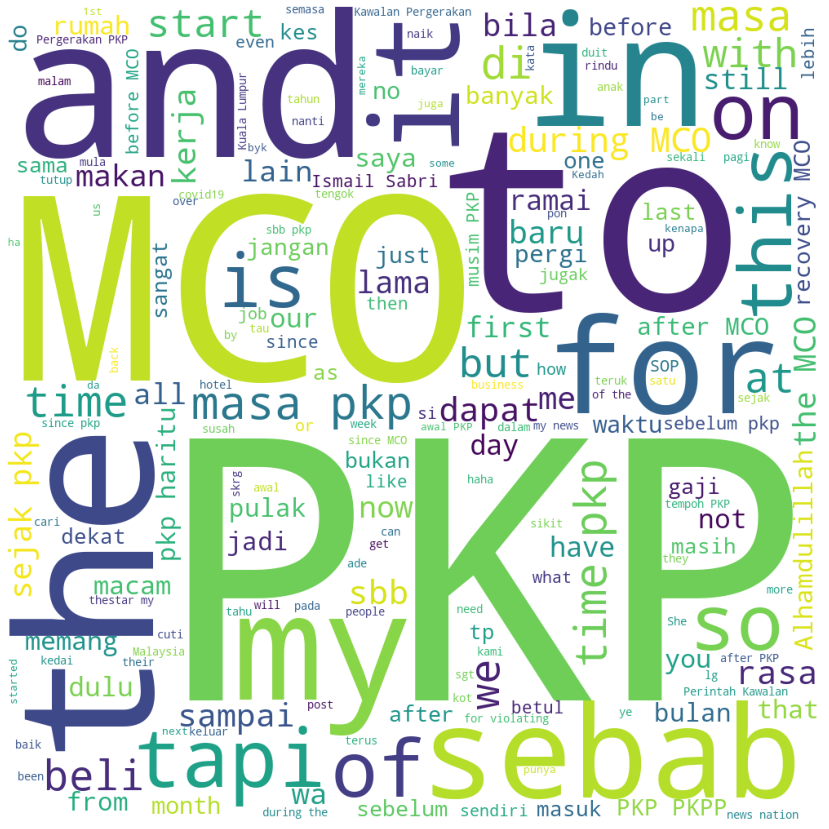

In [14]:
# Word cloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS 

#stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['dpt', 'eh', 'hahaha', 'weh', 'utk', 'dgn', 'takde', 'apa','org', 'kat', 'amp', 'laa', 'kau', 'mcm', 'kg', 'com', 'nk', 'la', 'kan', 'kt', 'igshid', 'https', 'www', 'instagram', 'dh', 'je', 'tu', 'nak', 'yang', 'aku', 'tak', 'dan', 'dah', 'yg', 'ada', 'kita', 'untuk', 'semua', 'ke', 'dia', 'boleh', 'buat', 'kena', 'balik', 'lah', 'ini', 'ni', 'pun', 'kalau', 'lagi', 'dengan', 'dari', 'lepas', 'hari', 'orang', 'habis']
#stopwords.extend(newStopWords)
stopwords = newStopWords


unique_string=(" ").join(corpus_list)
wordcloud = WordCloud(width = 1000, height = 1000, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(unique_string)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
# Available Transformer models
malaya.sentiment.available_transformer()

{'albert': ['48.6 MB', 'accuracy: 0.992'],
 'alxlnet': ['46.8 MB', 'accuracy: 0.991'],
 'bert': ['425.6 MB', 'accuracy: 0.993'],
 'tiny-albert': ['22.4 MB', 'accuracy: 0.985'],
 'tiny-bert': ['57.4 MB', 'accuracy: 0.987'],
 'xlnet': ['446.5 MB', 'accuracy: 0.993']}

In [16]:
# Using stacking models for better results
# 3 models = BERT-base-bahasa, Multinomial (Complement Naive Bayes) and XLNET-base-bahasa
bert = malaya.sentiment.transformer('bert')
multinomial = malaya.sentiment.multinomial()
xlnet = malaya.sentiment.transformer('xlnet')

downloading frozen /root/Malaya/sentiment/bert/base model


100%|██████████| 426/426 [00:13<00:00, 31.0MB/s]


downloading frozen /root/Malaya/sentiment/bert/base vocab


184%|██████████| 1.00/0.54 [00:00<00:00, 3.22MB/s]


downloading frozen /root/Malaya/sentiment/bert/base tokenizer


135%|██████████| 1.00/0.74 [00:00<00:00, 2.73MB/s]


downloading frozen /root/Malaya/sentiment/multinomial model


3.00MB [00:00, 6.76MB/s]                          


downloading frozen /root/Malaya/sentiment/multinomial vector


117%|██████████| 3.00/2.57 [00:00<00:00, 6.60MB/s]


downloading frozen /root/Malaya/sentiment/multinomial bpe


120%|██████████| 1.00/0.83 [00:00<00:00, 2.64MB/s]


downloading frozen /root/Malaya/sentiment/xlnet/base model


447MB [00:14, 30.8MB/s]                         


downloading frozen /root/Malaya/sentiment/xlnet/base vocab


184%|██████████| 1.00/0.54 [00:00<00:00, 3.24MB/s]


downloading frozen /root/Malaya/sentiment/xlnet/base tokenizer


135%|██████████| 1.00/0.74 [00:00<00:00, 2.66MB/s]


In [17]:
def cls_corpus(corpus_list):

  data = []
  for i in corpus_list: 
    corpus_result = malaya.stack.predict_stack([bert, multinomial, xlnet], [i])
    for j in corpus_result:
      corpus_result = j.values()
      data.append([corpus_result, i])

  df = pd.DataFrame(data)
  df2 = pd.DataFrame(df[0].values.tolist(), index=df.index)
  df2.columns=['Negative', 'Positive', 'Neutral']
  df2['Classification'] = df2[['Negative','Positive','Neutral']].idxmax(axis=1)
  df2['Text'] = df[1]

  class_count  = df2['Classification'].value_counts().sort_index()
  plt.figure(figsize=(20,9))
  #sns.barplot(class_count.index, class_count.values, alpha=0.8)
  ax = class_count.plot.bar(color=['red', 'yellow', 'green'], figsize=(20, 9))
  plt.xticks(rotation=0)
  plt.title("Twitter Sentiment Analysis on {} in Malaysia".format(keyword), fontweight='bold', fontsize=15)
  plt.ylabel('Number of Sentiment', fontweight='bold', fontsize=15)
  plt.xlabel('Classification', fontweight='bold', fontsize=15)
  plt.grid(True)
  
  i = 0
  label = np.round(class_count.values, 2)
  for p in ax.patches:
      ax.annotate(str(round(p.get_height(),2 )), (p.get_x() * 1.005, p.get_height() * 1.01), fontweight='bold', fontsize=15)
      i = i+1

  pd.options.display.max_columns = None
  pd.set_option('display.expand_frame_repr', False)
  print(df2)
  print("")
  print("Total Number of Tweets: ", df2['Classification'].count())
  print("")
  s = df2.Classification
  counts = s.value_counts()
  percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
  df3 = pd.DataFrame({'Counts': counts, 'Percentage': percent100})
  print(df3)
  print("")
  plt.show()

     Negative  Positive   Neutral Classification                                               Text
0    0.000007  0.791889  0.000675       Positive  Terima kasih Ya Allah. Kami bermula kecil keci...
1    0.820623  0.000369  0.036549       Negative  Oh I remember si Aleya ni dulu yang viral seba...
2    0.173167  0.000026  0.000573       Negative  sama lah macam absolute salted cake. Aku beli ...
3    0.021526  0.018077  0.072629        Neutral  sejak pkp mmg susah cri krja kan, i know sama ...
4    0.991232  0.000001  0.000142       Negative  Ingatkn waktu pkp ni kes pemandu mabuk tiada, ...
..        ...       ...       ...            ...                                                ...
949  0.000022  0.985200  0.002190       Positive  After MCO, Village Park Expanded to 3 shop lot...
950  0.053167  0.030104  0.314684        Neutral  last makan betul2 sehari sebelum nak pkp... la...
951  0.049980  0.004190  0.063263        Neutral  Target dalam setahun tapi bertaburan semuanya ...


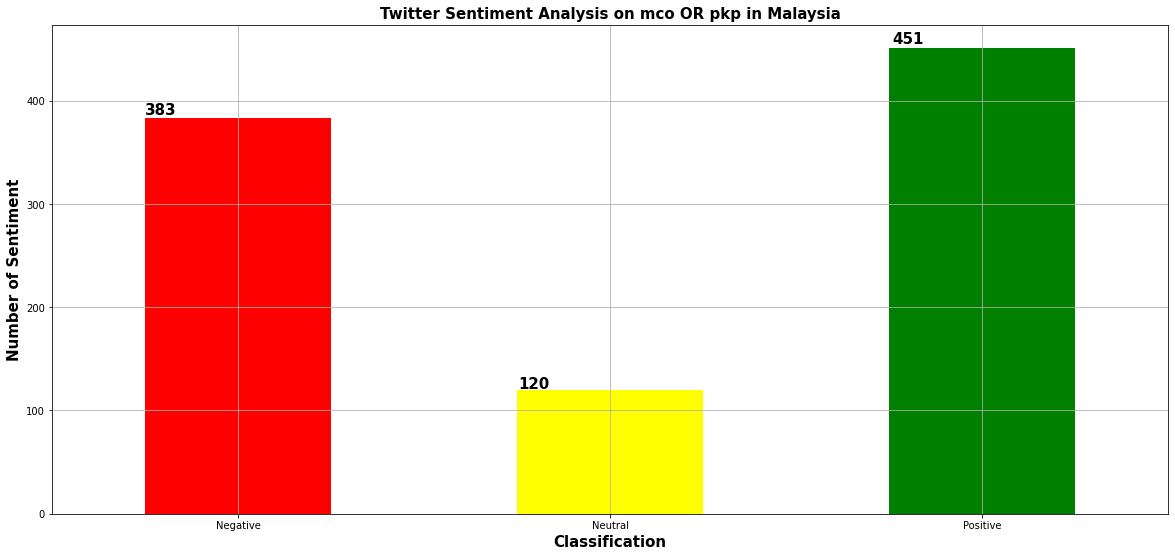

In [18]:
cls_corpus(corpus_list)